In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
df = pd.read_csv('train_loan_predection.csv')

In [3]:
df.shape

(614, 13)

In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
df = df.set_index('Loan_ID')

In [6]:
df = df.dropna(how='any') # Here we can either fillna with some value(backwarfill/forwardfill)

In [7]:
df.shape

(480, 12)

In [8]:
# Convert Dependents column to integers
df['Dependents'] = df.Dependents.apply(lambda x:int(x.replace('+', '')))

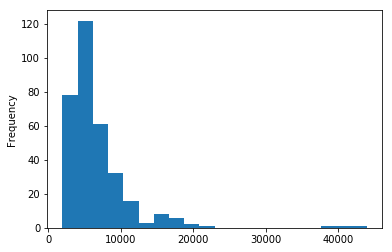

In [9]:
loan_status_map = {'Y': 1, 'N': 0}
df['Loan_Status_int'] = df.Loan_Status.map(loan_status_map)
df['TotalIncome'] = df.ApplicantIncome + df.CoapplicantIncome
df[df.Loan_Status == 'Y'].TotalIncome.plot(kind='hist', bins=20)

In [10]:
columns_retained = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
                    'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
                    'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']

In [11]:
columns = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

In [12]:
df = df[columns_retained]

In [13]:
df = pd.get_dummies(df, columns=columns, drop_first=True)

In [14]:
X_train, X_test= train_test_split(df, test_size=0.2, random_state=42)

In [15]:
X_test.shape, X_train.shape

((96, 13), (384, 13))

In [16]:
y_train = X_train['Loan_Status_Y']
y_test = X_test['Loan_Status_Y']

In [17]:
X_train = X_train.drop('Loan_Status_Y', axis=1)
X_test = X_test.drop('Loan_Status_Y', axis=1)

In [18]:
clf = RandomForestClassifier(n_estimators=500, n_jobs=1, max_features=None)

In [19]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [20]:
d = dict(zip(clf.feature_importances_, X_test.columns))

In [21]:
d

{0.04132961912213376: 'Dependents',
 0.21240490694485295: 'ApplicantIncome',
 0.10156373394316032: 'CoapplicantIncome',
 0.19660844149851603: 'LoanAmount',
 0.05817783945696377: 'Loan_Amount_Term',
 0.28096558908359415: 'Credit_History',
 0.015481804366464022: 'Gender_Male',
 0.020386649636654437: 'Married_Yes',
 0.0170379130689681: 'Education_Not Graduate',
 0.01700842276264113: 'Self_Employed_Yes',
 0.023400825602432066: 'Property_Area_Semiurban',
 0.015634254513619297: 'Property_Area_Urban'}

In [22]:
y_pred = clf.predict(X_test)

In [23]:
print(confusion_matrix(y_pred=y_pred, y_true=y_test))

[[13 15]
 [ 3 65]]


In [24]:
print(accuracy_score(y_pred=y_pred, y_true=y_test))

0.8125


In [25]:
ldf = pd.read_csv('test_loan_predection.csv')

In [26]:
ldf = ldf.set_index('Loan_ID')

In [27]:
ldf = ldf.dropna(how='any')

In [28]:
ldf.shape

(289, 11)

In [29]:
ldf['Dependents'] = ldf.Dependents.apply(lambda x: int(x.replace('+', '')))

In [30]:
columns_retained = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
                    'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
                    'Loan_Amount_Term', 'Credit_History', 'Property_Area']

In [31]:
columns = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']

In [32]:
ldf = ldf[columns_retained]
ldf = pd.get_dummies(ldf, columns=columns, drop_first=True)

In [33]:
y_test_pred = clf.predict(ldf)

In [34]:
ldf['Loan_Status'] = y_test_pred

In [37]:
# print the loan prediction on sample data
ldf.reset_index()[['Loan_ID', 'Loan_Status']].head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001051,0
4,LP001054,1
